# 0. Variable

In [2]:
import os
import sys
import pandas as pd

In [3]:
data_path = './raw_data_features/RDK7.csv'
activity_col = 'pChEMBL Value'
task_type = 'C'
target_thresh = 7
var_thresh = 0.05
scoring = 'f1'

# **1. Data Itergration**

In [5]:
import os
import sys
sys.path.append('./Codebase/qsar')
from Data_integration import Data_Integration
from Data_preprocess import Data_preprocess
from Outliers_handling import Univariate_Outliers, Mutivariate_Outliers
from Rescale import rescale
from Feature_selection import feature_selection_pipeline
from Feature_engineering import feature_engineering
from Model_selection import model_selection
from Meta_analysis import statistic_data, statistic_test
from Posthoc import statical_test
data = pd.read_csv(data_path)
data.drop(['Canomicalsmiles'], axis =1, inplace = True)
data.head()

,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,9.30,1,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,1,0,0
1,9.22,1,1,0,0,0,1,0,1,1,...,1,1,0,0,0,1,0,0,0,0
2,9.15,1,1,0,0,0,1,0,1,1,...,1,1,0,0,0,1,0,0,0,0
3,9.00,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,8.74,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0


Data train: (1995, 4097)
Data test: (499, 4097)
***************************************************************************


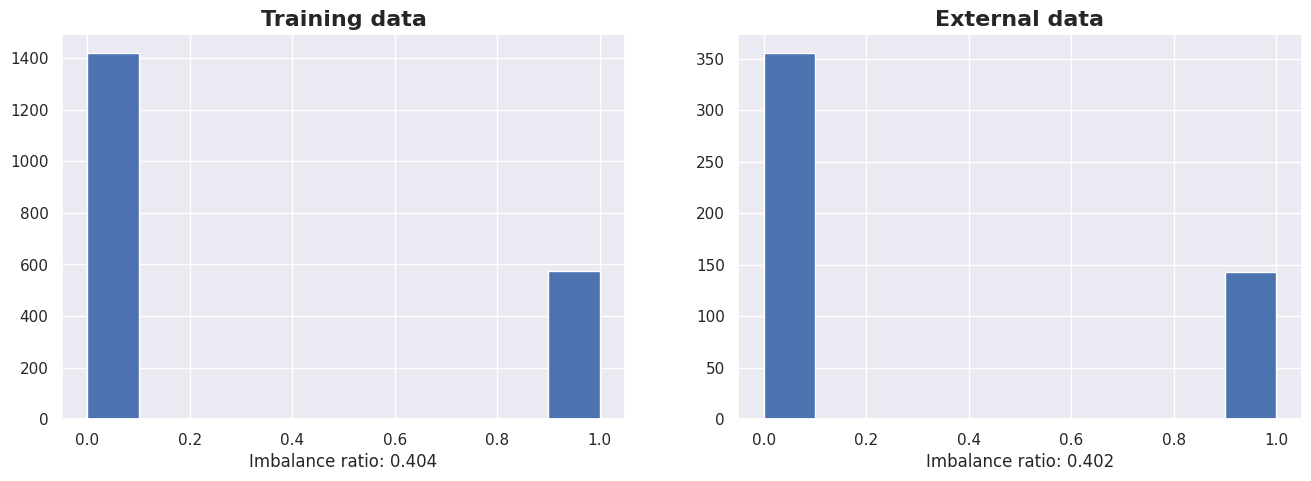

In [5]:
integration = Data_Integration(data, activity_col = activity_col, task_type= task_type, target_thresh = target_thresh)
integration.fit()
Data_train = integration.data_train
Data_test = integration.data_test

# **2. Data Preprocessing**

Total duplicated rows-train: 63
Data train before drop duplicates: 1995
Data train after drop duplicates: 1932
***************************************************************************
Total duplicated rows-test: 4
Data test before drop duplicates: 499
Data test after drop duplicates: 495
***************************************************************************
Index(['2342'], dtype='object')
Total similar columns: 1
Data train before drop duplicates: (1932, 4097)
Data after drop duplicates: (1932, 4096)
***************************************************************************
Data test before drop duplicates: (495, 4097)
Data test after drop duplicates: (495, 4096)
***************************************************************************
Empty DataFrame
Columns: [ColumnName, TotalMissingVals, PercentMissing]
Index: []
Drop_cols []
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-test with missing value 0
(1932, 4095) (1932,)
>Threshold=0.00, Features=4095
>Threshold=0.05, Features=4058
>Threshold=0.10, Features=3645
>Threshold=0.15, Features=2721
>Threshold=0.20, Features=1619


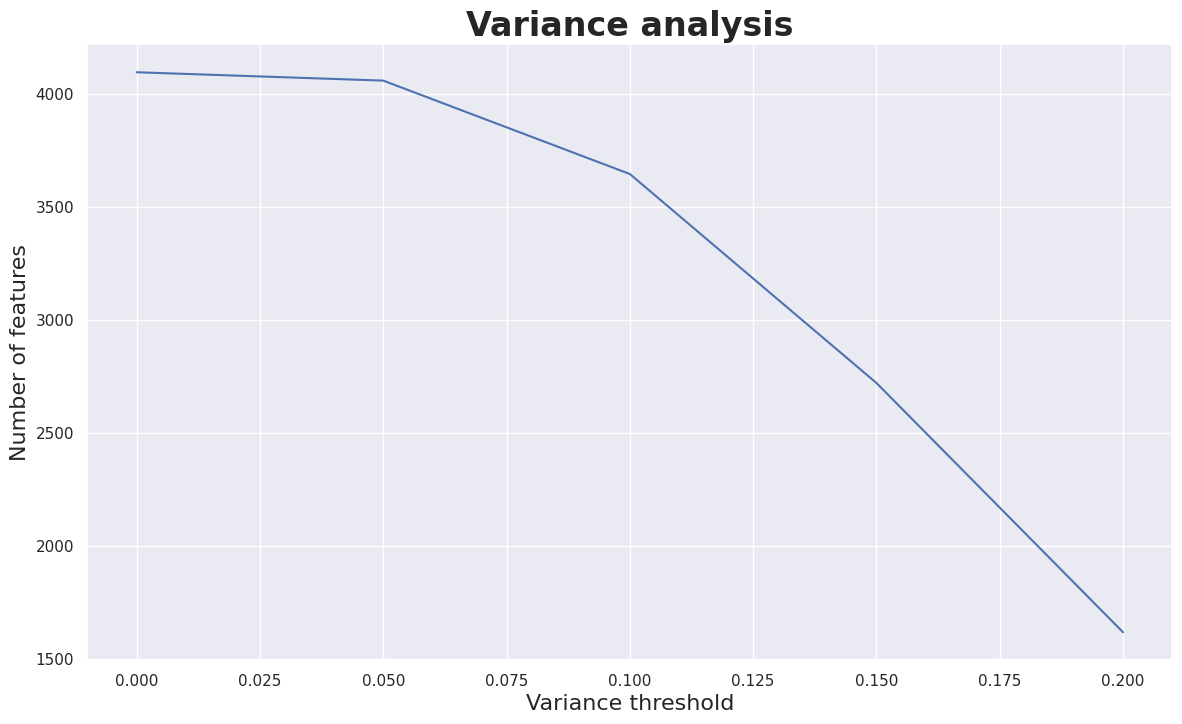

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [6]:
from Data_preprocess import Data_preprocess
preprocess = Data_preprocess(Data_train, Data_test, var_thresh = var_thresh,
                                     activity_col = activity_col)
preprocess.fit()
Data_train = preprocess.data_train
Data_test = preprocess.data_test

# **3. Outlier Handeling**

## 3.1. Univariate

In [7]:
univariate = Univariate_Outliers(Data_train, Data_test, 
                                   activity_col= activity_col, handling_method = 'Transformation',
                                   Kbin_handling ='Y', variance_threshold = 'Y')
univariate.fit()
Data_train = univariate.data_train
Data_test = univariate.data_test
Data_train.shape

Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique


(1932, 4059)

## 3.2. Multivariate

In [8]:
mutivariate = Mutivariate_Outliers(Data_train,Data_test, 
                                           method = 'LocalOutlierFactor')
mutivariate.fit()
Data_train = mutivariate.data_train
Data_test = mutivariate.data_test

Total outlier remove by LOF: 112


# 4. Rescale

In [9]:
rescaling = rescale(Data_train,Data_test, 
                            activity_col=activity_col, scaler_method = 'MinMaxScaler')
rescaling.fit()
Data_train = rescaling.data_train
Data_test = rescaling.data_test

***************************************************************************
Scaling method: MinMaxScaler


In [10]:
Data_train.shape

(1820, 4059)

# **5. Feature Selection**

## 5.1. AP

Please select metric you want to compare:
	1:Average Precision
	2:F1_score
	3:Recall
 1


>Baseline 0.898 ± 0.034 (0.903)
>Chi2 0.864 ± 0.040 (0.877)
>Mutual_info 0.848 ± 0.044 (0.847)
>RF 0.898 ± 0.035 (0.906)
>ExT 0.898 ± 0.037 (0.912)
>Ada 0.891 ± 0.032 (0.899)
>Grad 0.895 ± 0.036 (0.895)
>XGB 0.897 ± 0.038 (0.908)
>Logistics 0.899 ± 0.036 (0.905)


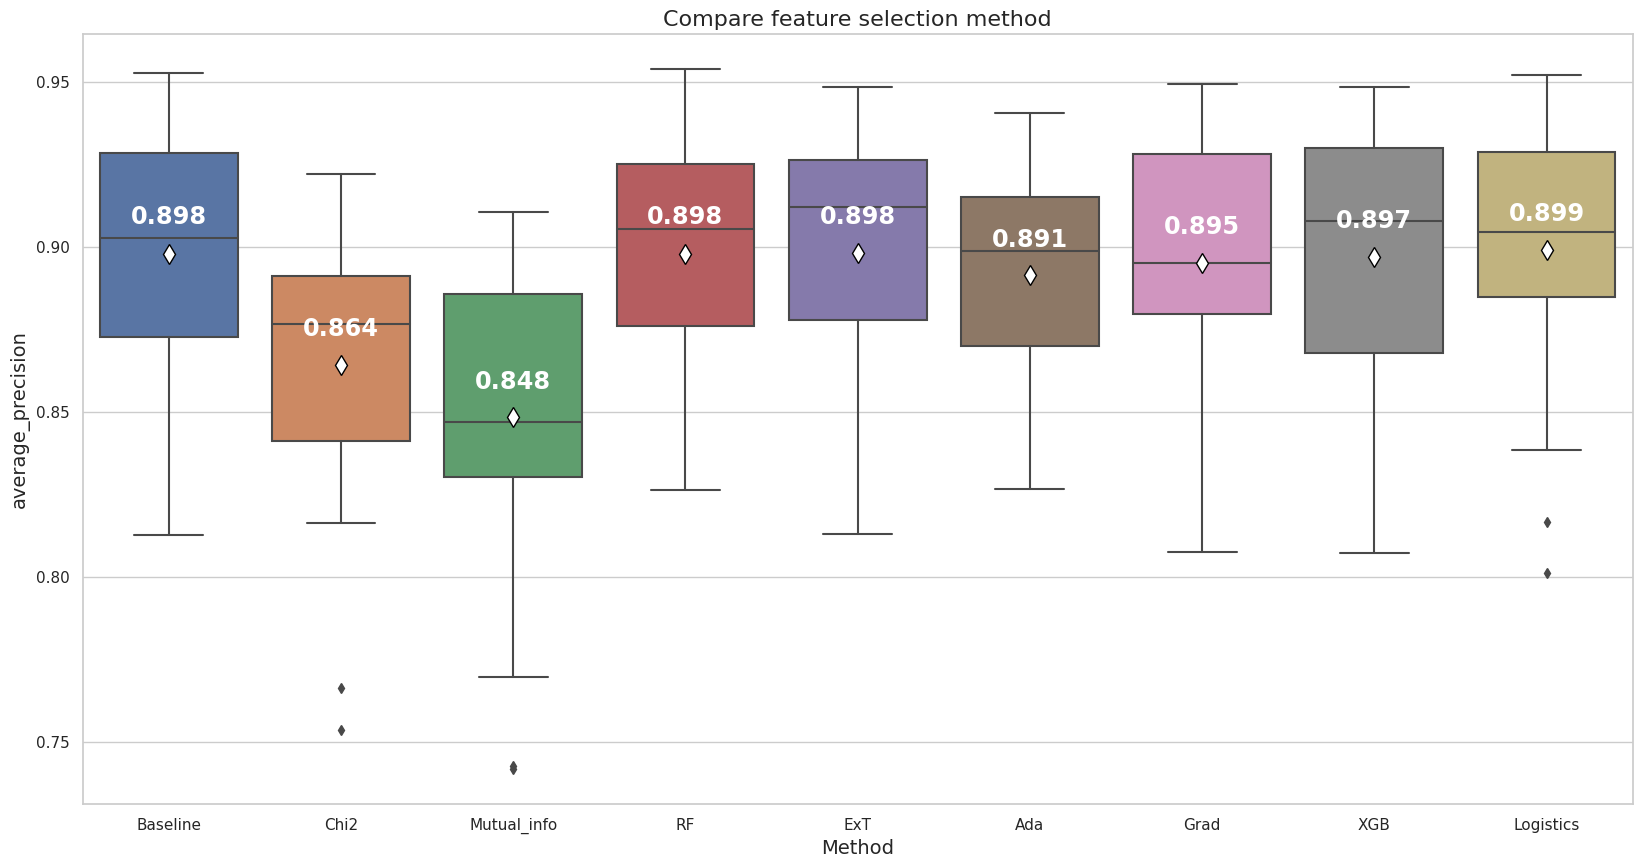

In [12]:
import warnings
warnings.filterwarnings('ignore')
Descriptor_select = feature_engineering(Data_train, Data_test, activity_col= activity_col)
Descriptor_select.case_model()
Descriptor_select.compare()

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Baseline,Chi2,2.568,0.282,0.001,0.959,0.040
1,Baseline,Mutual_info,3.139,0.070,0.000,0.991,0.009
2,Baseline,RF,0.006,1.000,0.027,0.027,0.946
3,Baseline,ExT,-0.055,1.000,0.058,0.047,0.894
4,Baseline,Ada,0.542,1.000,0.088,0.381,0.531
5,Baseline,Grad,0.384,1.000,0.041,0.156,0.802
6,Baseline,XGB,0.138,1.000,0.042,0.070,0.888
7,Baseline,Logistics,-0.164,1.000,0.111,0.063,0.827
8,Chi2,Mutual_info,1.217,1.000,0.028,0.672,0.300
9,Chi2,RF,-2.870,0.136,0.973,0.000,0.026


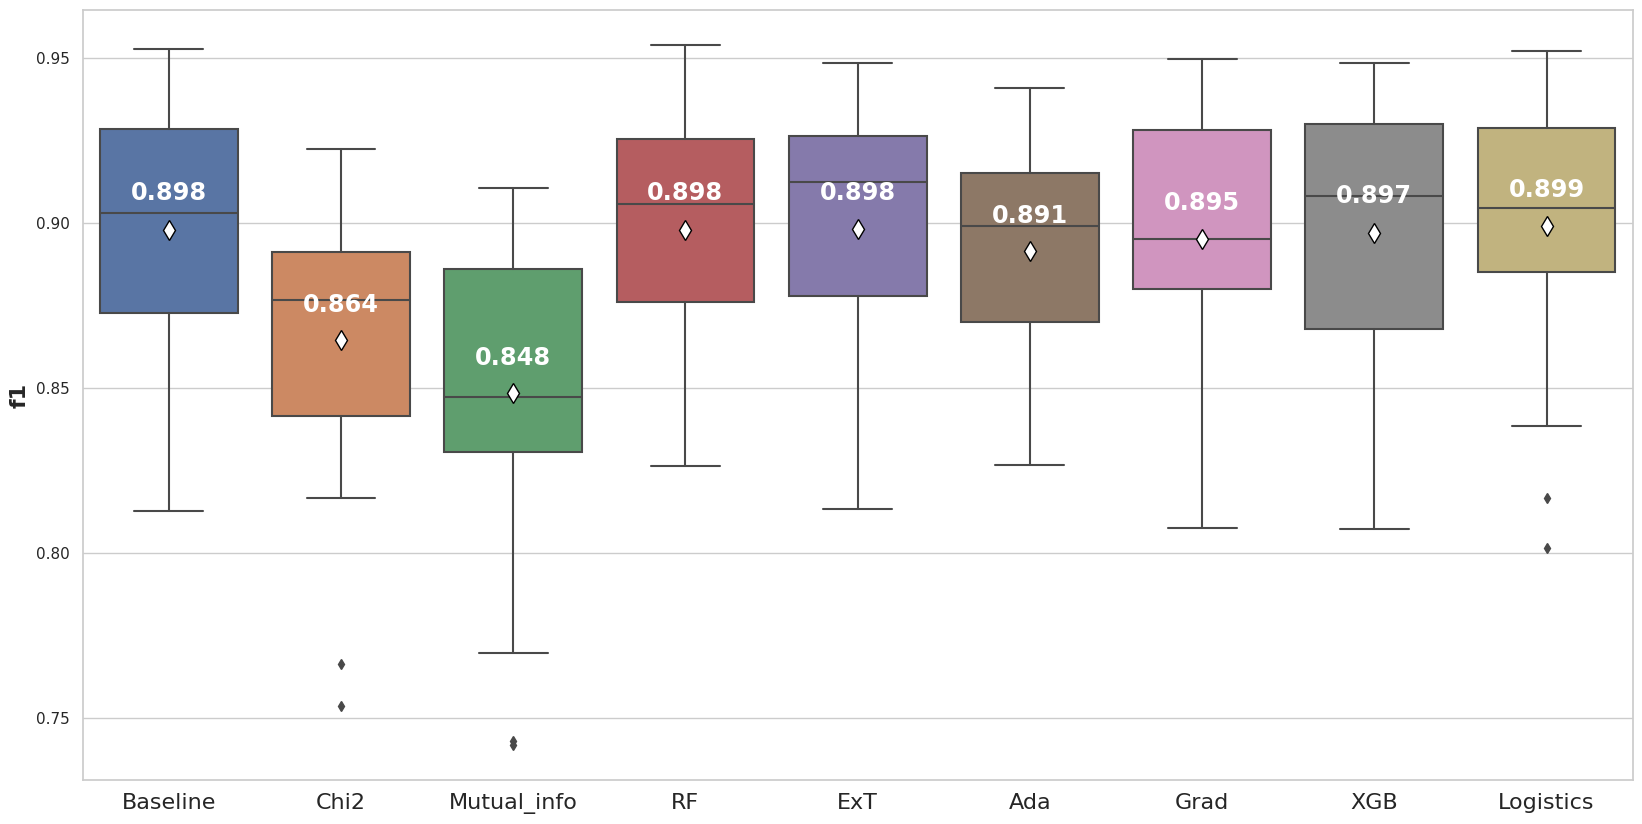

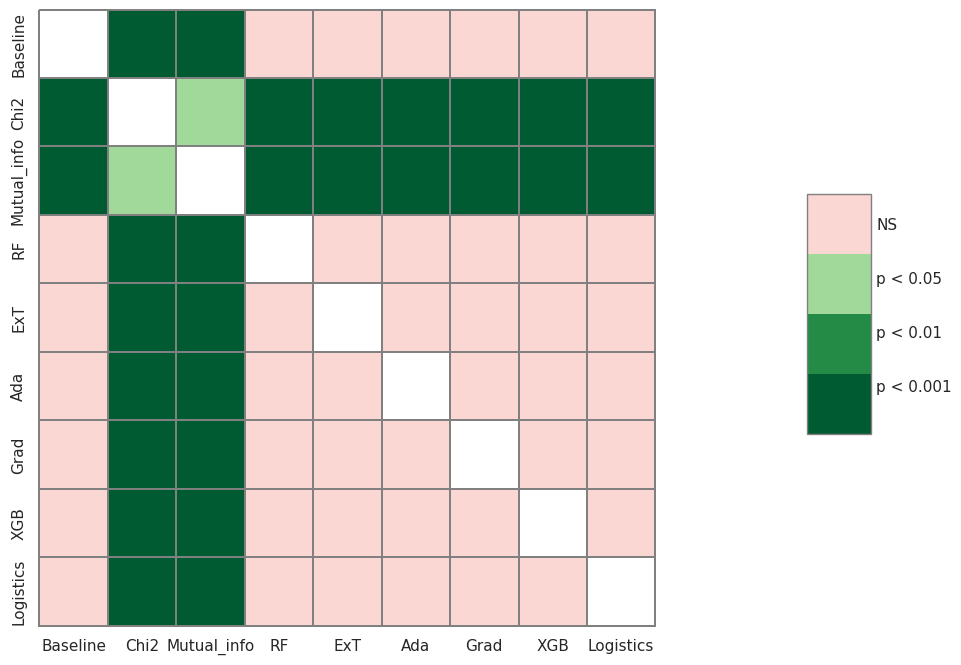

In [13]:
features_compare = statical_test(Descriptor_select.results,Descriptor_select.names,
                                 X_train = Descriptor_select.X_train,y_train = Descriptor_select.y_train)
features_compare.visualize()

## 5.2 F1

Please select metric you want to compare:
	1:Average Precision
	2:F1_score
	3:Recall
 2


>Baseline 0.820 ± 0.036 (0.822)
>Chi2 0.777 ± 0.045 (0.780)
>Mutual_info 0.766 ± 0.053 (0.769)
>RF 0.815 ± 0.037 (0.819)
>ExT 0.814 ± 0.036 (0.818)
>Ada 0.813 ± 0.036 (0.817)
>Grad 0.811 ± 0.038 (0.811)
>XGB 0.819 ± 0.035 (0.821)
>Logistics 0.819 ± 0.041 (0.830)


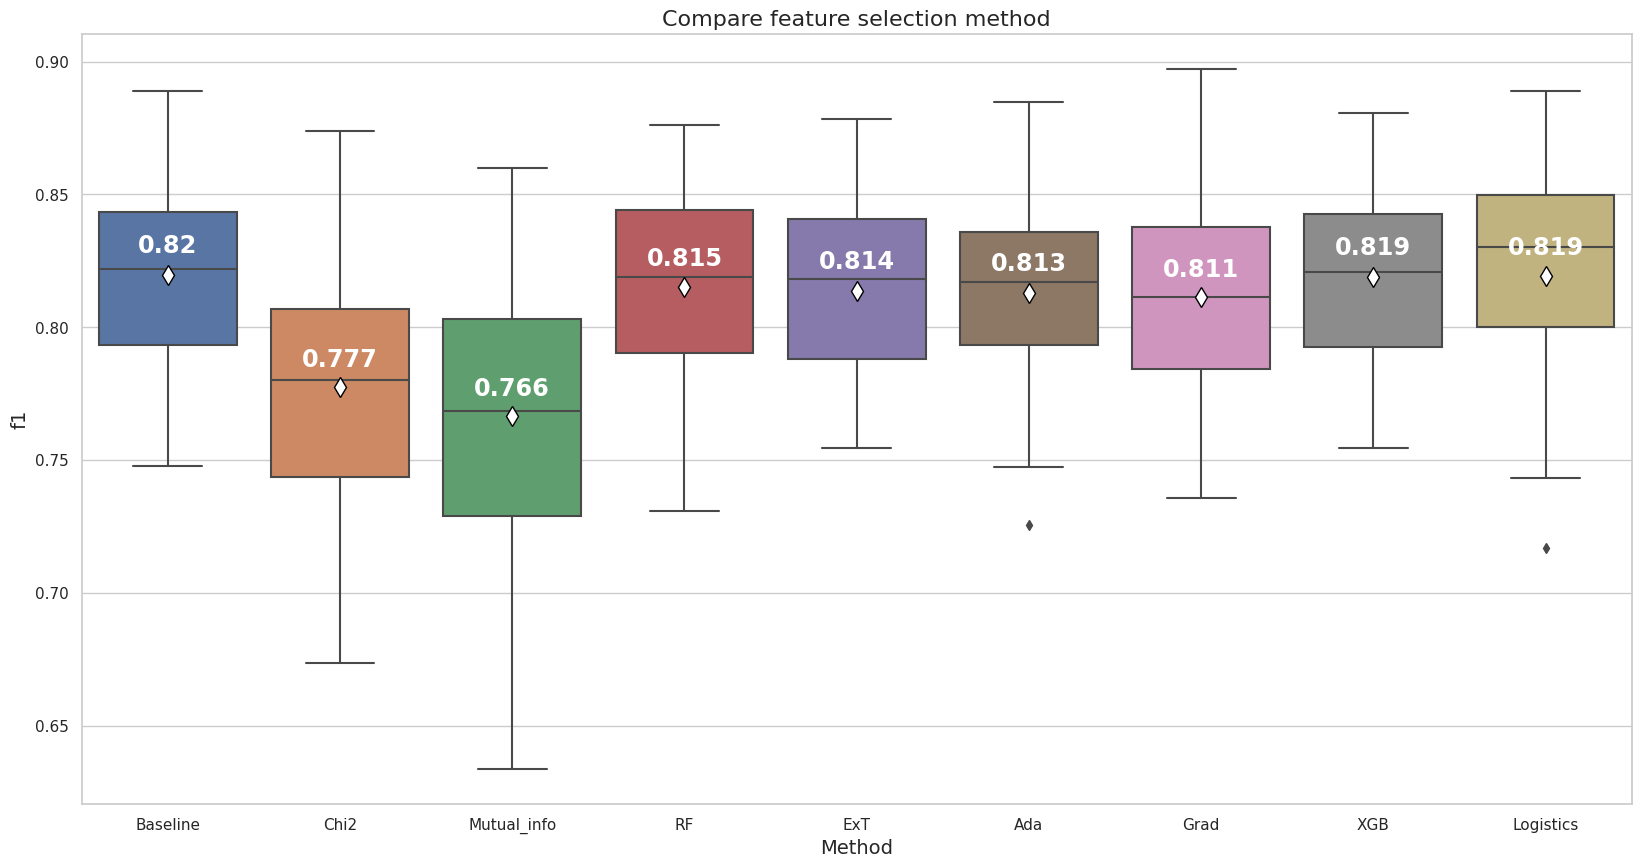

In [14]:
import warnings
warnings.filterwarnings('ignore')
Descriptor_select = feature_engineering(Data_train, Data_test, activity_col= activity_col)
Descriptor_select.case_model()
Descriptor_select.compare()

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Baseline,Chi2,2.540,0.301,0.002,0.969,0.029
1,Baseline,Mutual_info,2.436,0.382,0.004,0.971,0.025
2,Baseline,RF,0.676,1.000,0.019,0.211,0.770
3,Baseline,ExT,0.865,1.000,0.013,0.274,0.713
4,Baseline,Ada,0.418,1.000,0.153,0.419,0.429
5,Baseline,Grad,0.827,1.000,0.040,0.435,0.525
6,Baseline,XGB,0.123,1.000,0.084,0.126,0.790
7,Baseline,Logistics,0.046,1.000,0.116,0.134,0.750
8,Chi2,Mutual_info,0.585,1.000,0.135,0.518,0.347
9,Chi2,RF,-2.238,0.595,0.945,0.004,0.051


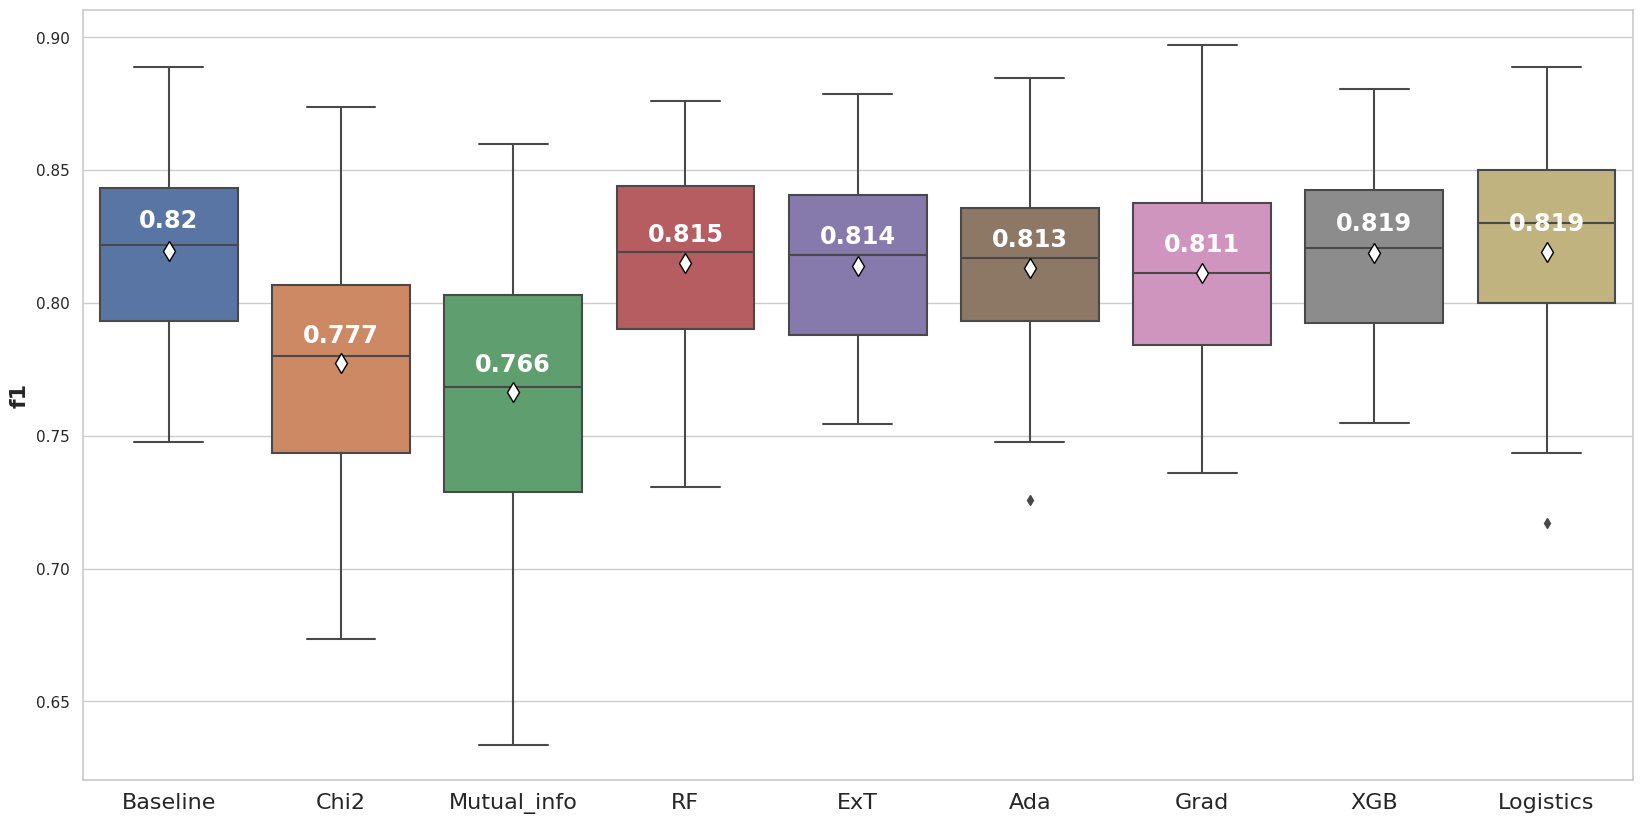

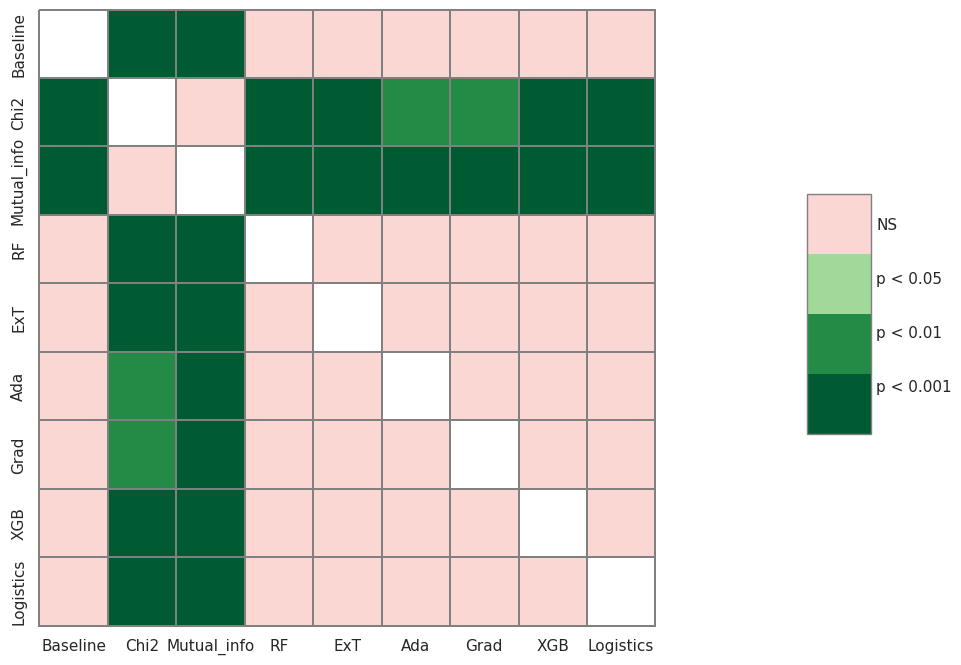

In [15]:
features_compare = statical_test(Descriptor_select.results,Descriptor_select.names,
                                 X_train = Descriptor_select.X_train,y_train = Descriptor_select.y_train)
features_compare.visualize()

## 5.3. Recall

Please select metric you want to compare:
	1:Average Precision
	2:F1_score
	3:Recall
 3


>Baseline 0.814 ± 0.049 (0.833)
>Chi2 0.744 ± 0.055 (0.750)
>Mutual_info 0.735 ± 0.058 (0.722)
>RF 0.802 ± 0.049 (0.815)
>ExT 0.801 ± 0.048 (0.806)
>Ada 0.801 ± 0.046 (0.806)
>Grad 0.804 ± 0.050 (0.806)
>XGB 0.810 ± 0.046 (0.815)
>Logistics 0.810 ± 0.053 (0.833)


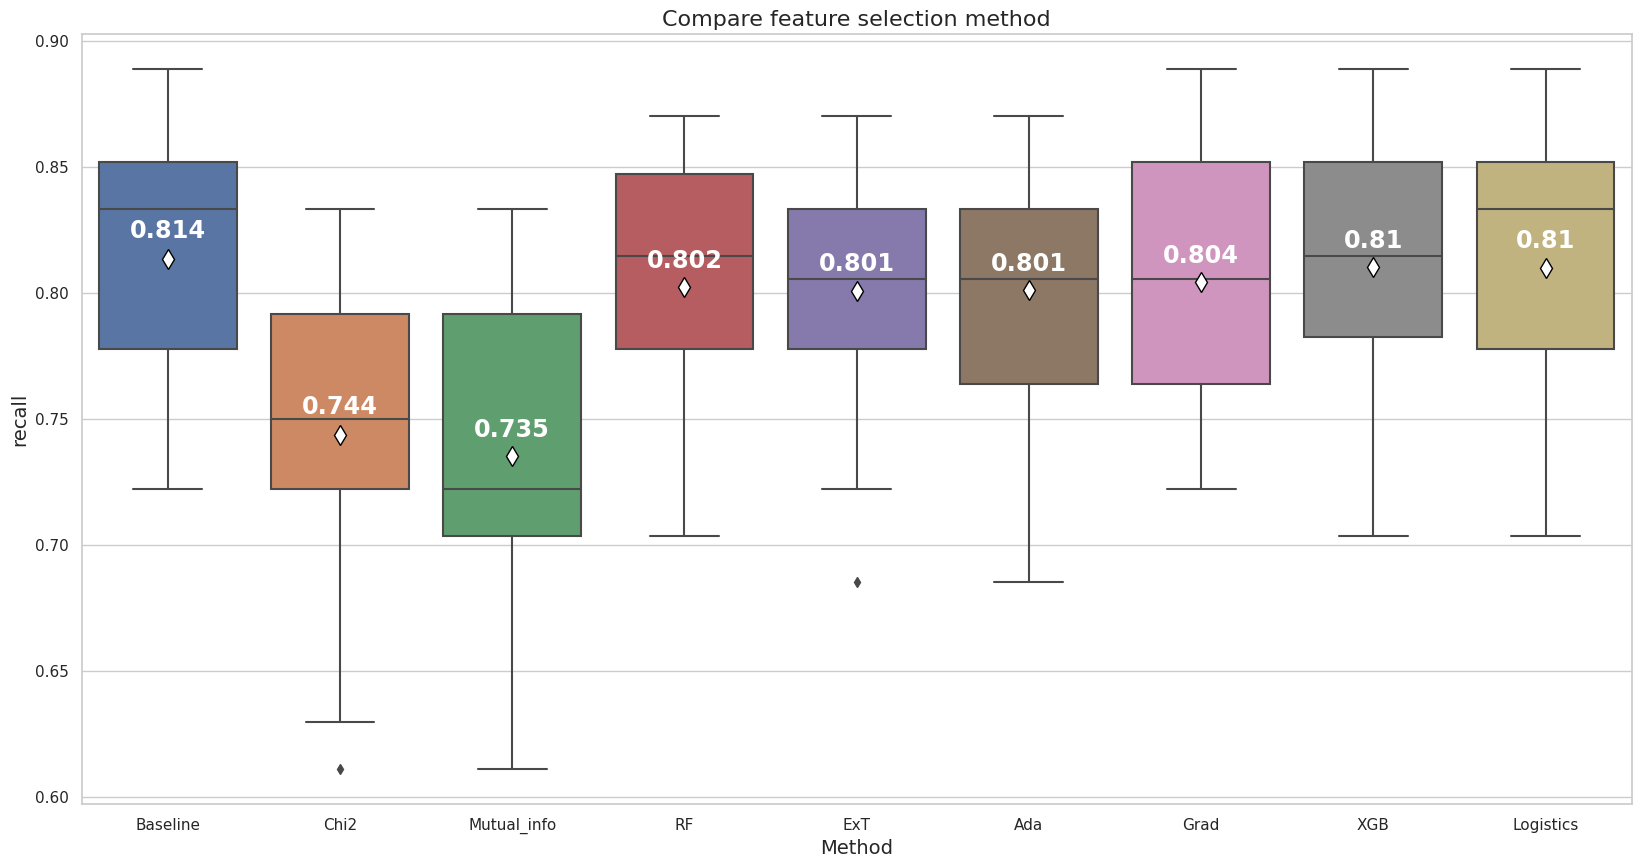

In [16]:
import warnings
warnings.filterwarnings('ignore')
Descriptor_select = feature_engineering(Data_train, Data_test, activity_col= activity_col)
Descriptor_select.case_model()
Descriptor_select.compare()

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Baseline,Chi2,3.077,0.082,0.001,0.993,0.006
1,Baseline,Mutual_info,3.681,0.017,0.000,0.998,0.001
2,Baseline,RF,0.832,1.000,0.062,0.533,0.405
3,Baseline,ExT,1.246,1.000,0.018,0.611,0.371
4,Baseline,Ada,0.565,1.000,0.158,0.542,0.300
5,Baseline,Grad,0.679,1.000,0.084,0.479,0.437
6,Baseline,XGB,0.297,1.000,0.109,0.255,0.636
7,Baseline,Logistics,0.302,1.000,0.136,0.306,0.558
8,Chi2,Mutual_info,0.376,1.000,0.212,0.477,0.312
9,Chi2,RF,-2.614,0.253,0.981,0.002,0.017


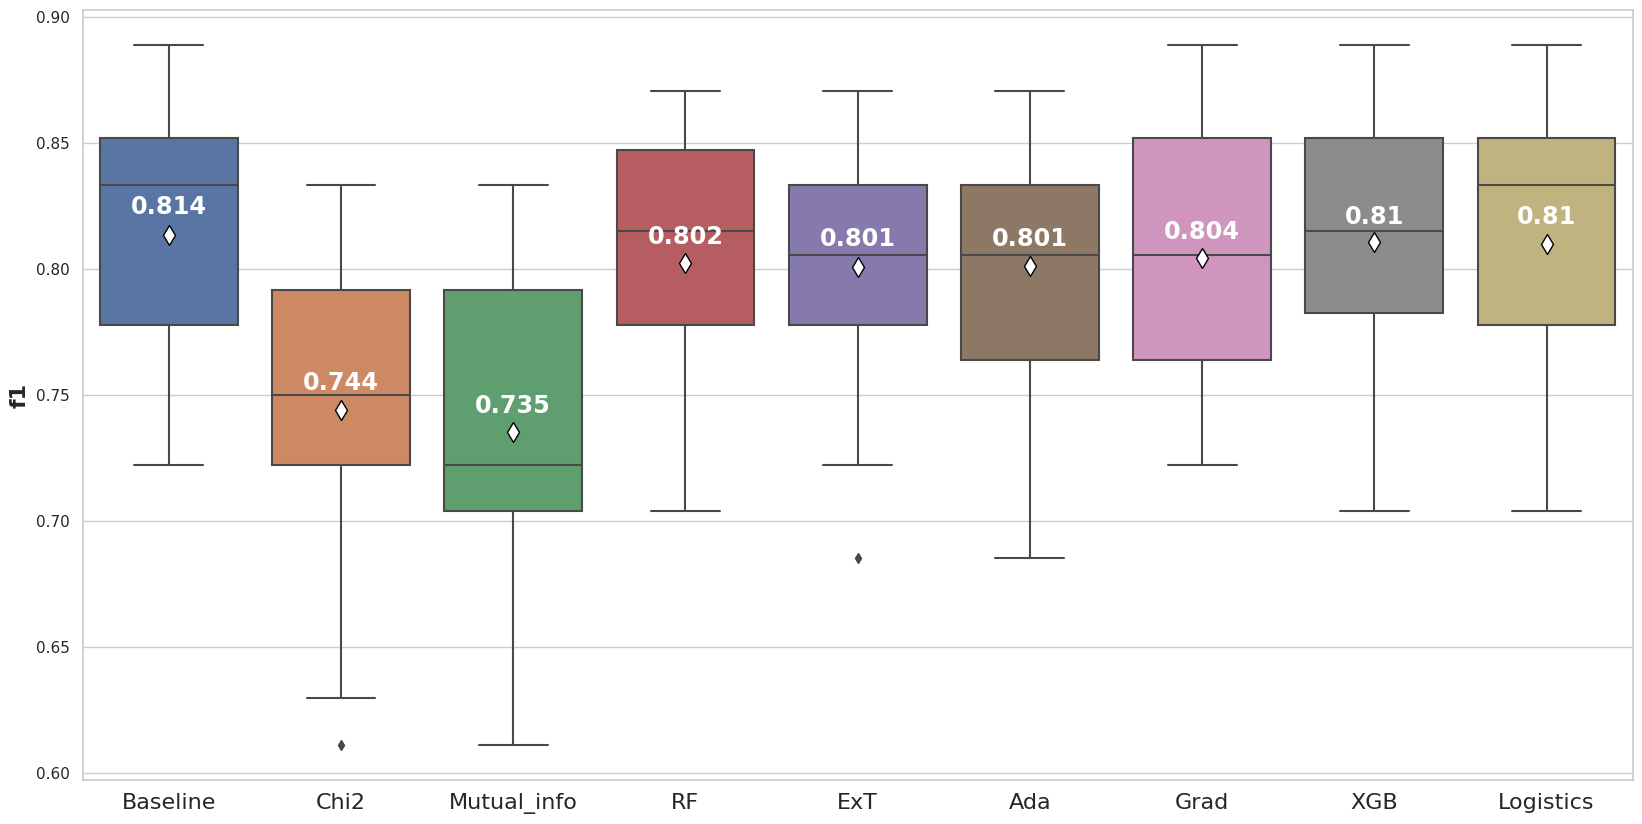

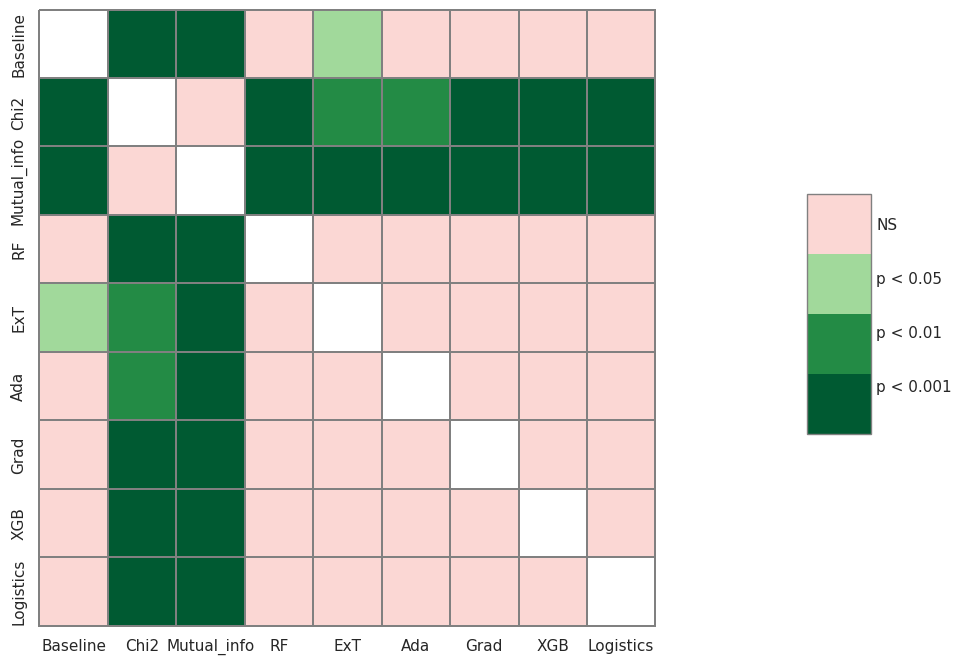

In [17]:
features_compare = statical_test(Descriptor_select.results,Descriptor_select.names,
                                 X_train = Descriptor_select.X_train,y_train = Descriptor_select.y_train)
features_compare.visualize()

## 5.3. Check number

In [70]:
methods = ['Anova','RF','ExT','Ada',
          'Grad','XGB','Linear','SVM',]
for i in methods:
    feature = feature_selection_pipeline(data_train=Data_train, data_test=Data_test, 
                                             activity_col=activity_col,task_type =task_type,
                                             scoring = scoring, method = i)
    feature.fit()
    print(i)
    print(feature.X_train_new.shape)
    print('****')

Anova
(1820, 20)
****
RF
(1820, 954)
****
ExT
(1820, 924)
****
Ada
(1820, 50)
****
Grad
(1820, 293)
****
XGB
(1820, 533)
****
Linear
(1820, 744)
****
SVM
(1820, 462)
****


In [22]:
# 6. Feature engineering
feature = feature_selection_pipeline(data_train=Data_train, data_test=Data_test, 
                                             activity_col=activity_col,task_type =task_type,
                                             scoring = scoring, method ='XGB')
feature.fit()
X_train = feature.X_train_new
X_test  = feature.X_test_new
y_train = feature.y_train
y_test  = feature.y_test
print(X_train.shape)

(1820, 533)


# **6. Model Selection**

>Logistic 0.828 ± 0.046 (0.824)
>KNN 0.762 ± 0.043 (0.778)
>SVM 0.805 ± 0.045 (0.810)
>RF 0.829 ± 0.036 (0.837)
>ExT 0.825 ± 0.036 (0.833)
>Ada 0.791 ± 0.043 (0.786)
>Grad 0.829 ± 0.048 (0.833)
>XGB 0.842 ± 0.039 (0.843)
>CatB 0.842 ± 0.044 (0.849)
>MLP 0.832 ± 0.046 (0.822)


,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Logistic,KNN,2.458,0.455,0.004,0.977,0.019
1,Logistic,SVM,0.911,1.000,0.101,0.695,0.204
2,Logistic,RF,-0.086,1.000,0.330,0.271,0.400
3,Logistic,ExT,0.161,1.000,0.253,0.364,0.383
4,Logistic,Ada,1.613,1.000,0.025,0.876,0.099
5,Logistic,Grad,-0.066,1.000,0.354,0.307,0.338
6,Logistic,XGB,-0.781,1.000,0.585,0.094,0.321
7,Logistic,CatB,-0.812,1.000,0.596,0.089,0.315
8,Logistic,MLP,-0.328,1.000,0.355,0.156,0.489
9,KNN,SVM,-2.814,0.196,0.980,0.001,0.019


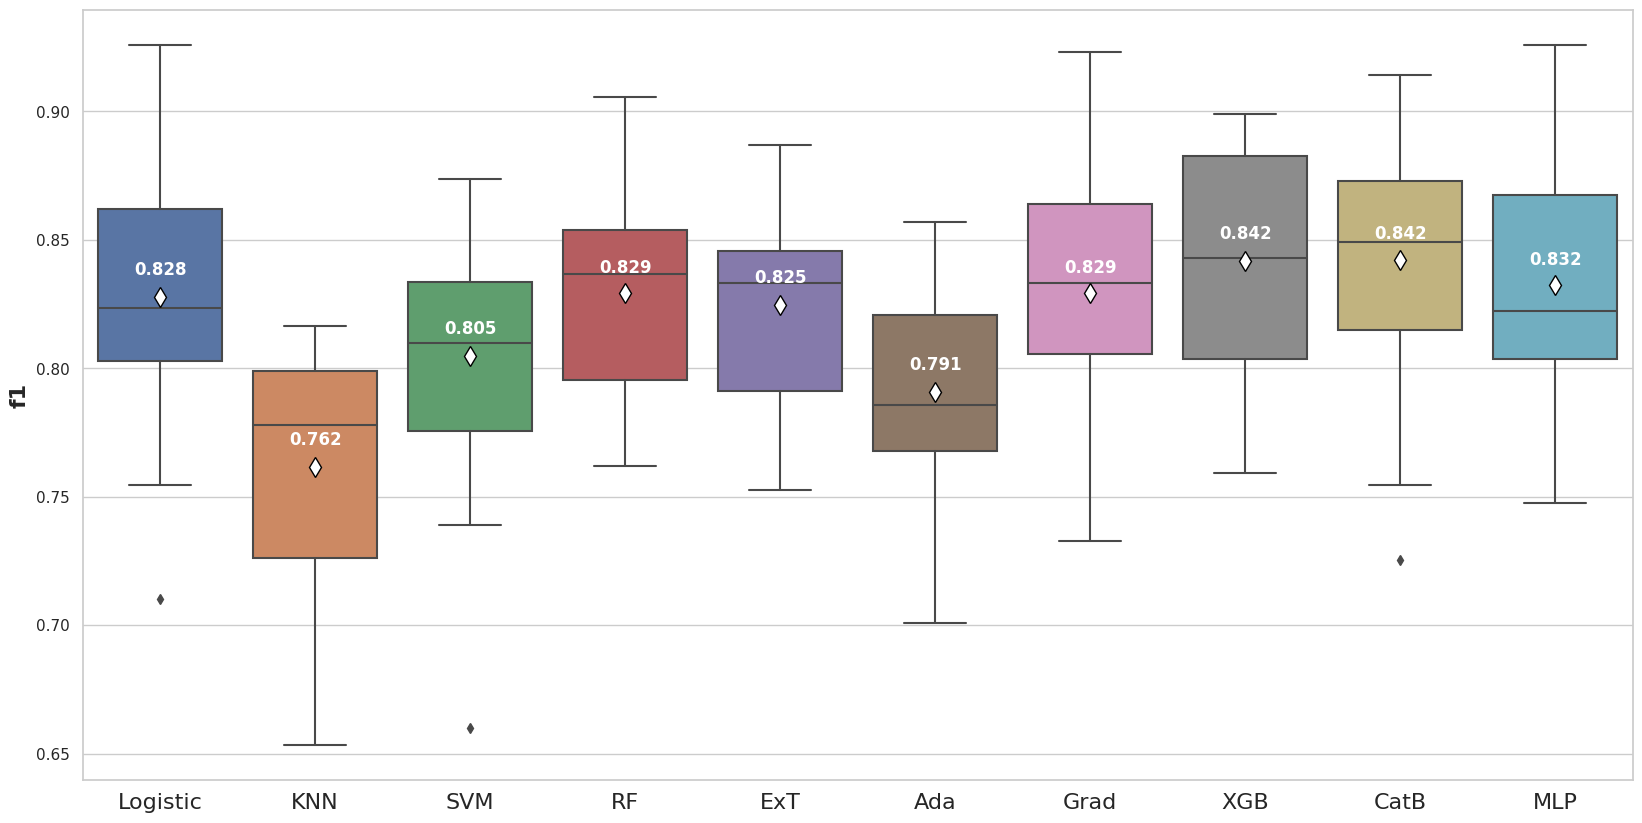

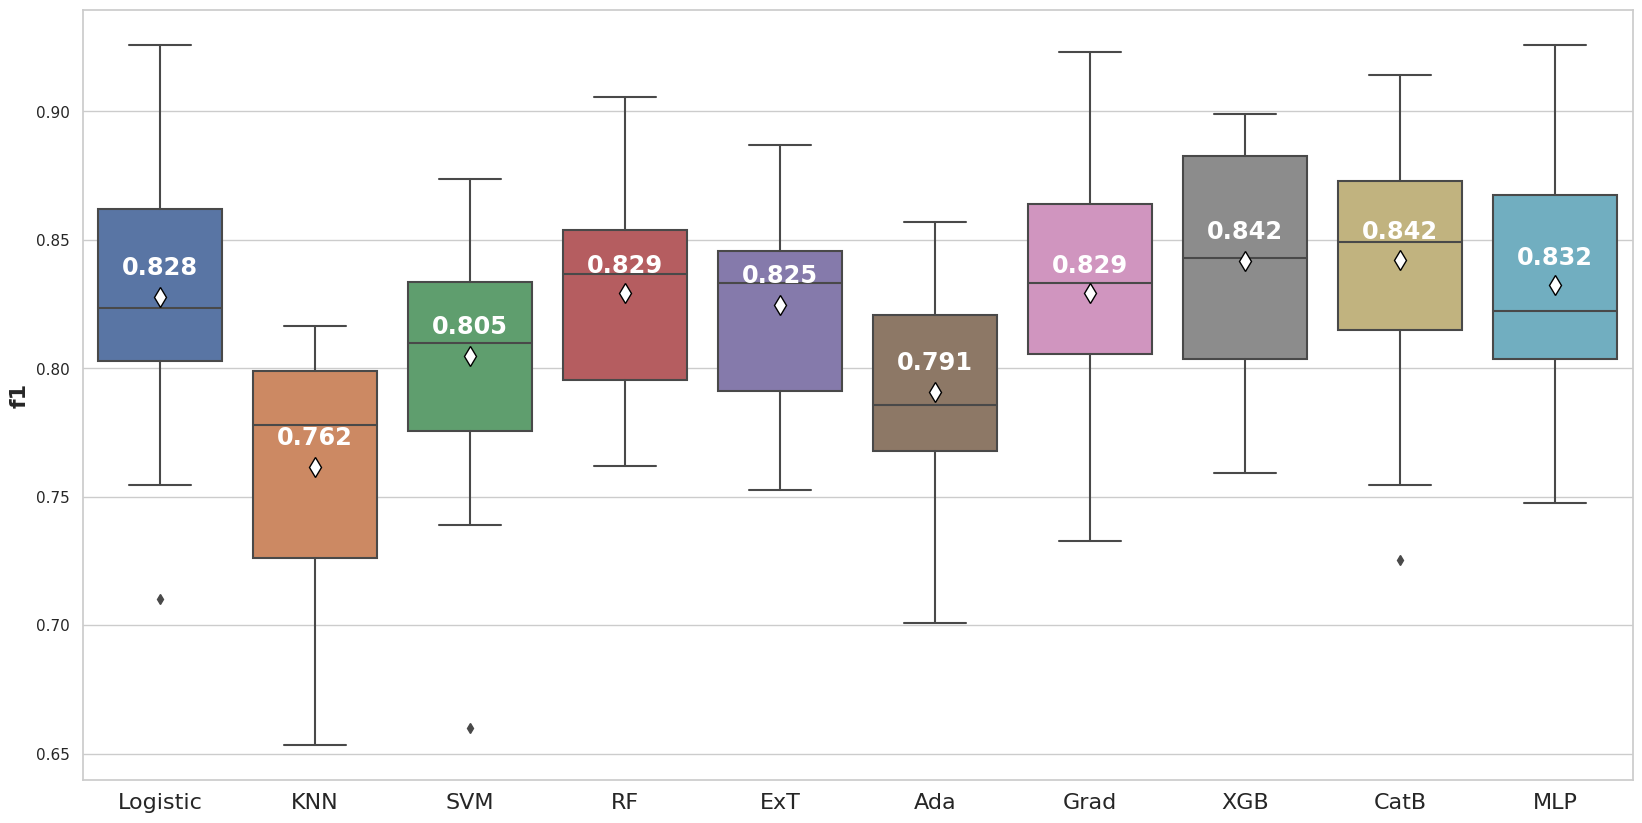

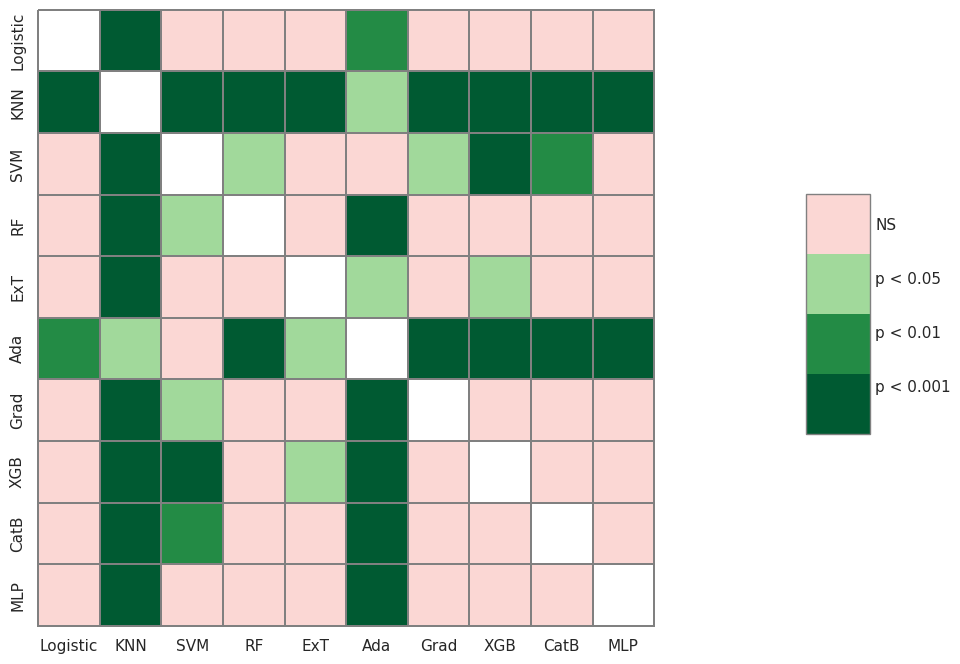

In [29]:
SAVE_PREFIX='./raw_data_features/Data_raw/f1_data_'

model = model_selection(X_train, y_train, SAVE_PREFIX=SAVE_PREFIX, 
                           data_name='RDK7', task_type =task_type,scoring = 'f1')
model.compare()
model.visualize()

features_compare = statical_test(model.results, model.names,
                                 X_train = model.X_train,y_train = model.y_train)
features_compare.visualize()

>Logistic 0.912 ± 0.032 (0.916)
>KNN 0.866 ± 0.033 (0.874)
>SVM 0.910 ± 0.034 (0.920)
>RF 0.912 ± 0.031 (0.920)
>ExT 0.883 ± 0.045 (0.887)
>Ada 0.890 ± 0.032 (0.898)
>Grad 0.921 ± 0.030 (0.928)
>XGB 0.929 ± 0.029 (0.939)
>CatB 0.927 ± 0.030 (0.936)
>MLP 0.917 ± 0.028 (0.922)


,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Logistic,KNN,2.796,0.204,0.001,0.982,0.017
1,Logistic,SVM,0.146,1.000,0.226,0.321,0.452
2,Logistic,RF,-0.003,1.000,0.260,0.258,0.482
3,Logistic,ExT,1.517,1.000,0.026,0.837,0.137
4,Logistic,Ada,1.702,1.000,0.010,0.827,0.163
5,Logistic,Grad,-0.571,1.000,0.457,0.110,0.433
6,Logistic,XGB,-1.297,1.000,0.702,0.024,0.274
7,Logistic,CatB,-1.035,1.000,0.627,0.046,0.328
8,Logistic,MLP,-0.599,1.000,0.268,0.039,0.693
9,KNN,SVM,-5.238,0.000,1.000,0.000,0.000


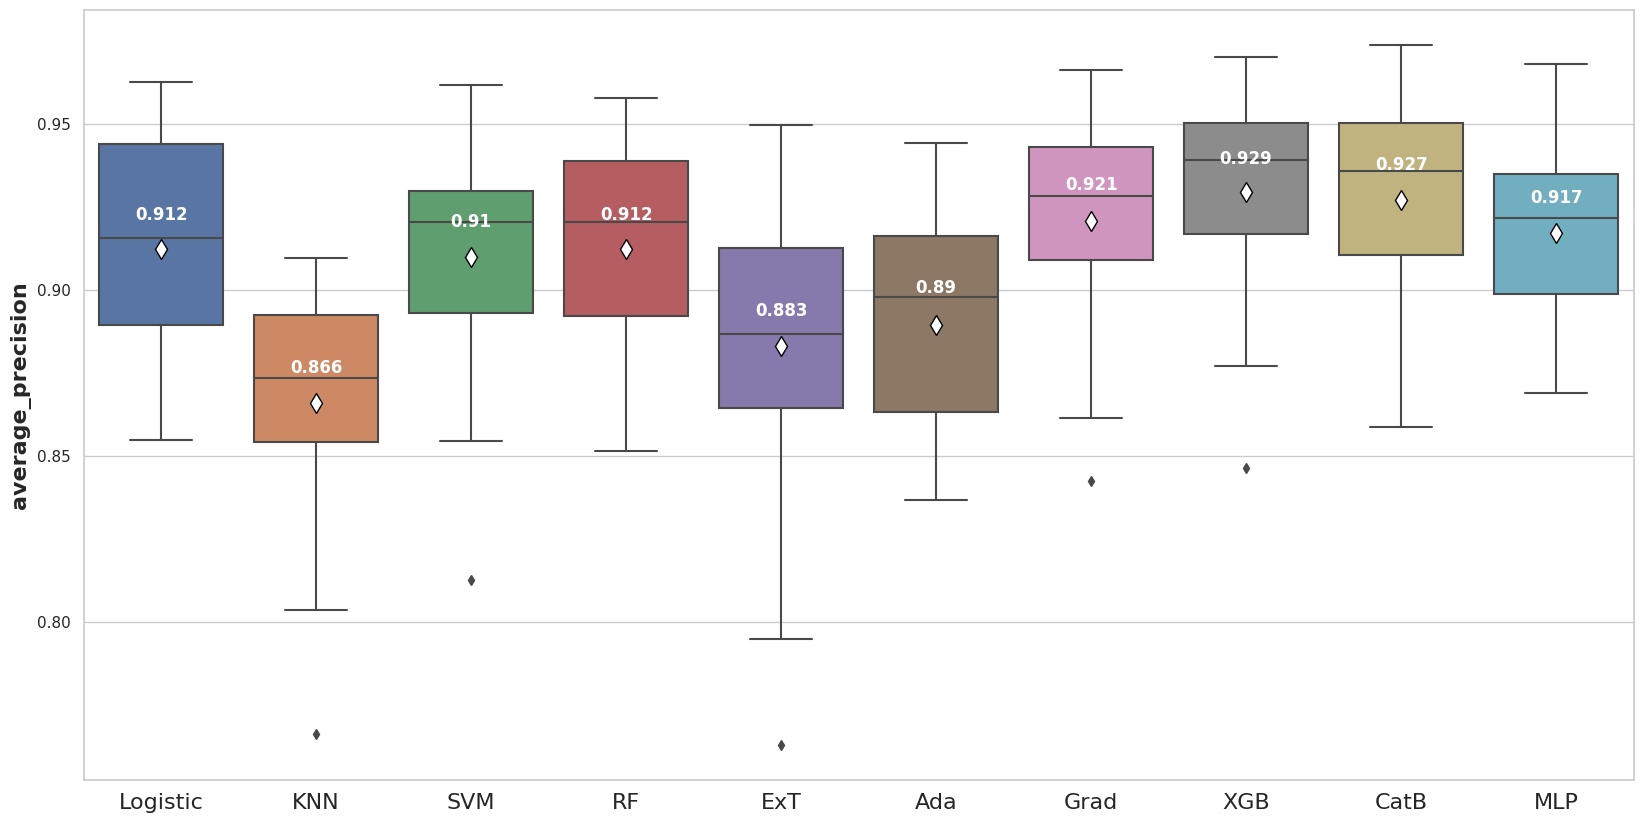

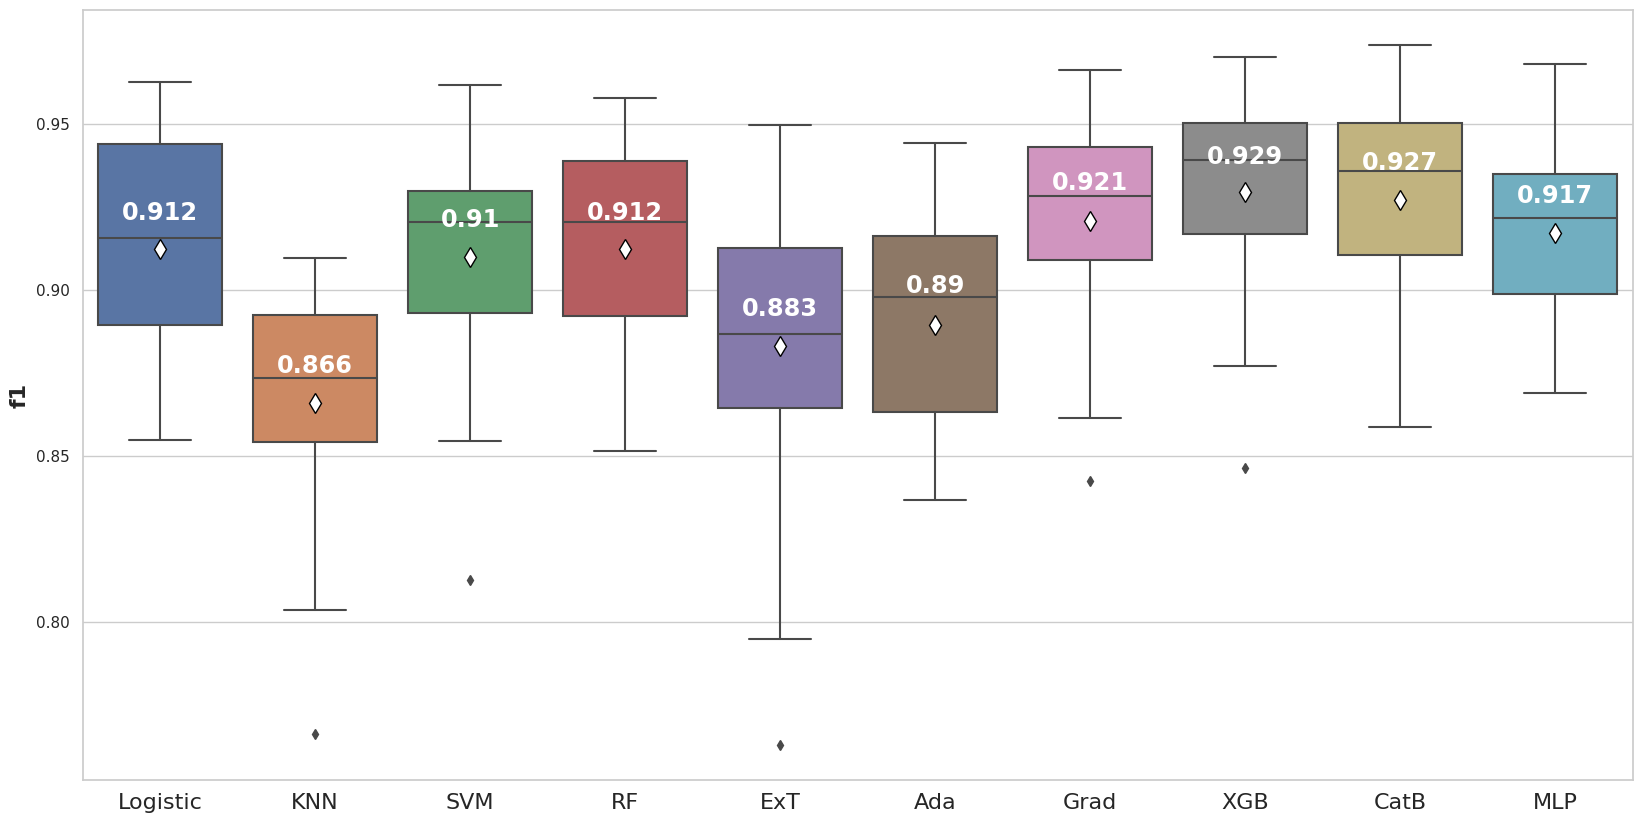

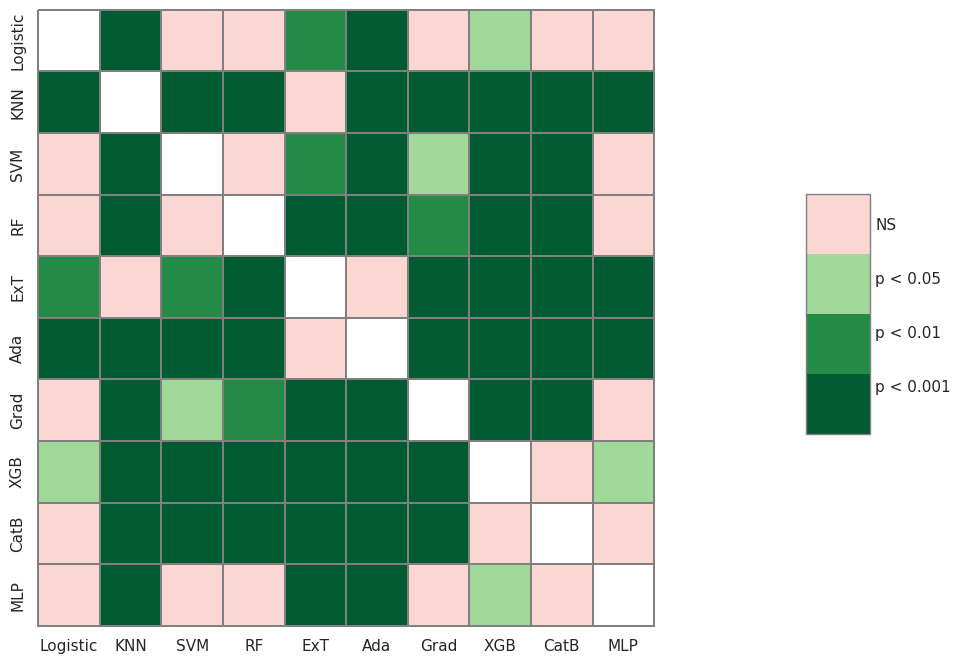

In [30]:
SAVE_PREFIX='./raw_data_features/Data_raw/ap_'

model = model_selection(X_train, y_train, SAVE_PREFIX=SAVE_PREFIX, 
                           data_name='RDK7', task_type =task_type,scoring = 'average_precision')
model.compare()
model.visualize()

features_compare = statical_test(model.results, model.names,
                                 X_train = model.X_train,y_train = model.y_train)
features_compare.visualize()

>Logistic 0.827 ± 0.057 (0.815)
>KNN 0.727 ± 0.053 (0.731)
>SVM 0.764 ± 0.058 (0.759)
>RF 0.818 ± 0.045 (0.833)
>ExT 0.820 ± 0.048 (0.815)
>Ada 0.777 ± 0.063 (0.778)
>Grad 0.807 ± 0.058 (0.815)
>XGB 0.835 ± 0.049 (0.833)
>CatB 0.822 ± 0.051 (0.833)
>MLP 0.836 ± 0.068 (0.833)


,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Logistic,KNN,2.875,0.169,0.002,0.993,0.006
1,Logistic,SVM,1.785,1.000,0.024,0.928,0.048
2,Logistic,RF,0.343,1.000,0.241,0.489,0.270
3,Logistic,ExT,0.236,1.000,0.292,0.467,0.240
4,Logistic,Ada,1.715,1.000,0.025,0.910,0.065
5,Logistic,Grad,0.688,1.000,0.154,0.632,0.214
6,Logistic,XGB,-0.257,1.000,0.464,0.275,0.261
7,Logistic,CatB,0.177,1.000,0.298,0.429,0.273
8,Logistic,MLP,-0.318,1.000,0.490,0.257,0.253
9,KNN,SVM,-1.863,1.000,0.908,0.012,0.080


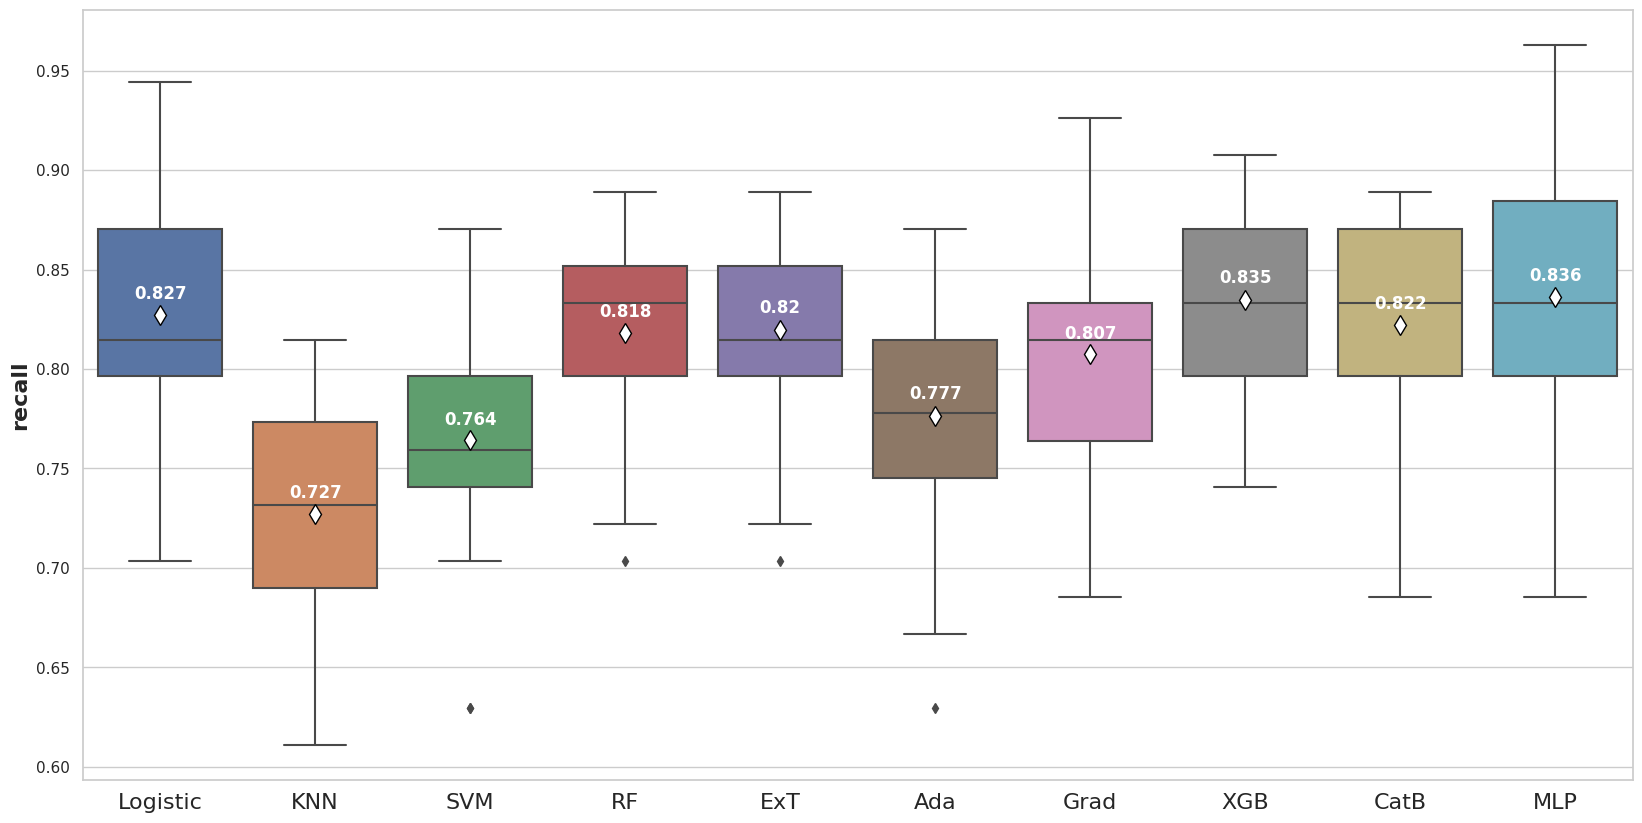

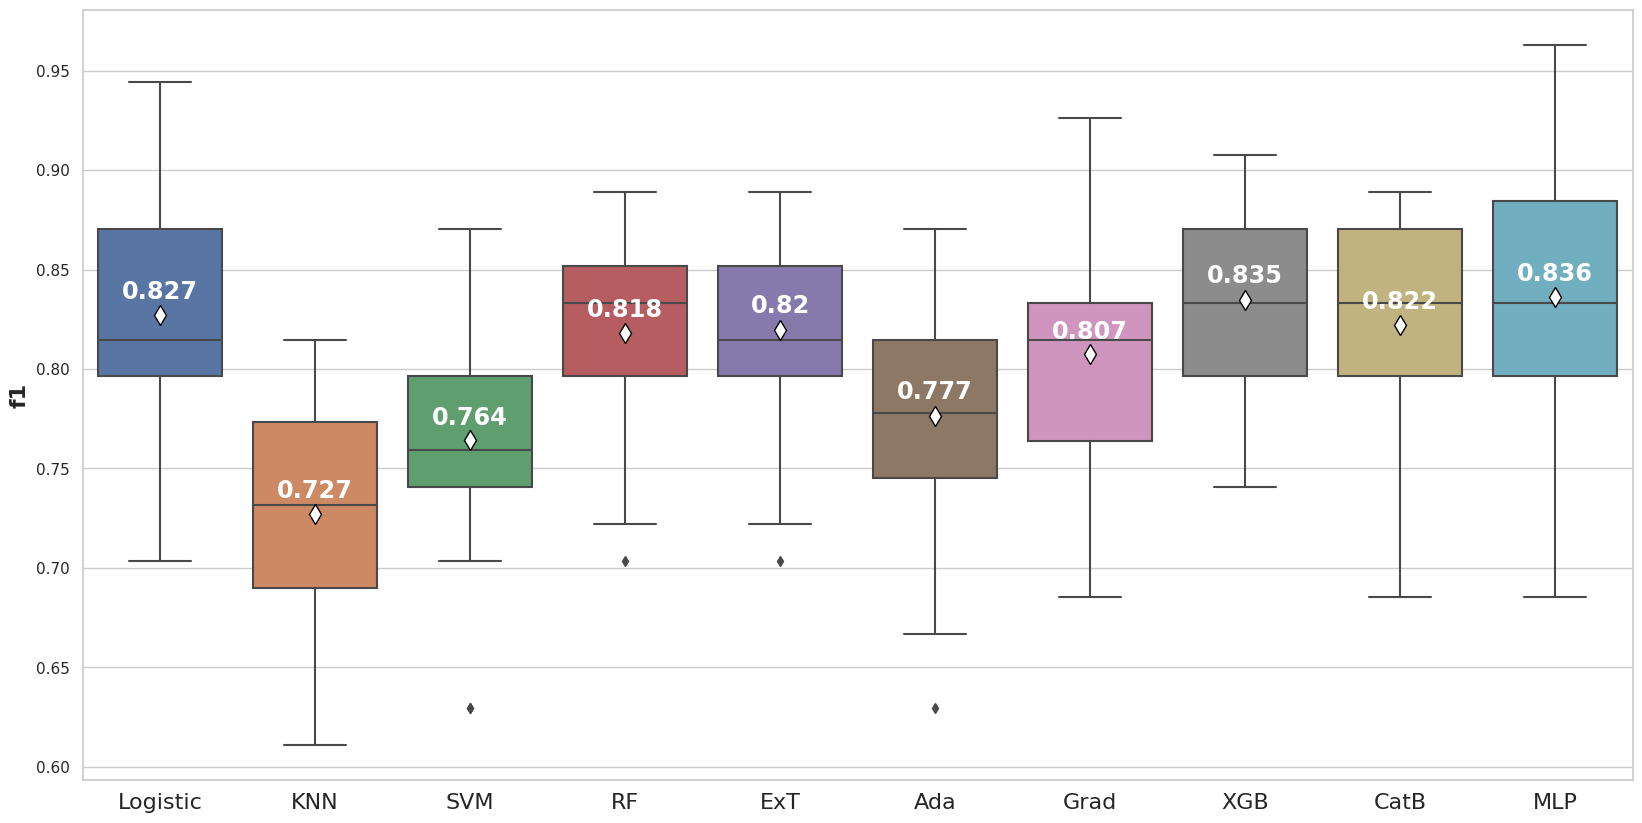

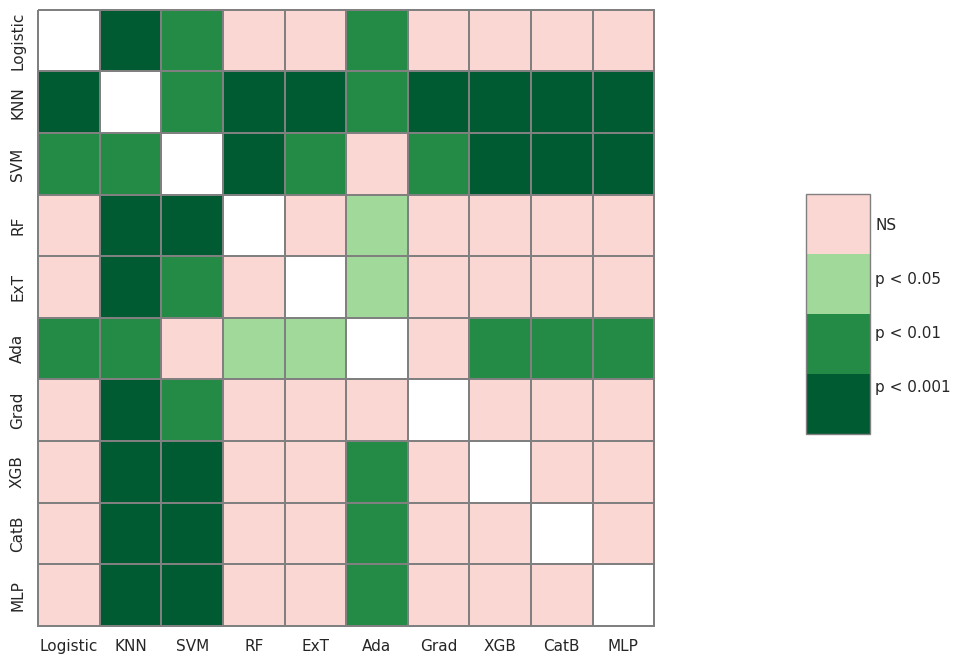

In [77]:
SAVE_PREFIX='./raw_data_features/Data_raw/recall_'

model = model_selection(X_train, y_train, SAVE_PREFIX=SAVE_PREFIX, 
                           data_name='RDK7', task_type =task_type,scoring = 'recall')
model.compare()
model.visualize()

features_compare = statical_test(model.results, model.names,
                                 X_train = model.X_train,y_train = model.y_train)
features_compare.visualize()

# **7. External Validation**

## 7.1. Classification

In [97]:
from Report import Classification_report

In [98]:
auto_models =  Classification_report(X_train, X_test, y_train, y_test, metric = None, create_df = True)
auto_models.model()

In [99]:
auto_models.df_compare_test

,roc_auc_score,average_precision_score,accuracy_score,recall_score,precision_score,f1_score,log_loss,brier_score_loss,hamming_loss,No. of obs.
Logistic Reg.,0.952,0.884,0.894,0.835,0.817,0.826,0.283,0.076,0.106,464.0
Knn,0.959,0.882,0.905,0.878,0.819,0.847,0.631,0.069,0.095,464.0
SVM,0.953,0.903,0.894,0.799,0.841,0.819,0.264,0.077,0.106,464.0
Decision Tree,0.861,0.697,0.821,0.705,0.700,0.703,0.410,0.129,0.179,464.0
Random Forest,0.957,0.907,0.905,0.871,0.823,0.846,0.307,0.071,0.095,464.0
Extra Tree,0.940,0.836,0.905,0.871,0.823,0.846,0.966,0.078,0.095,464.0
Ada Boost,0.943,0.891,0.886,0.791,0.821,0.806,0.655,0.231,0.114,464.0
Gradient Boost,0.955,0.910,0.914,0.842,0.867,0.854,0.239,0.070,0.086,464.0
XGBoost,0.960,0.921,0.912,0.878,0.836,0.856,0.274,0.072,0.088,464.0
CAT Boost,0.962,0.917,0.914,0.871,0.846,0.858,0.219,0.064,0.086,464.0


## 7.2. Baseline model

In [100]:
from sklearn.metrics import classification_report, roc_auc_score, recall_score

In [30]:
#Define model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, recall_score
model    = XGBClassifier(random_state = 42, verbosity=0, eval_metrics ='logloss')
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))
print('AUC =', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print('AP =', average_precision_score(y_test, model.predict_proba(X_test)[:,1]))
print('F1 =', f1_score(y_test, model.predict(X_test)))
print('recall =', recall_score(y_test, model.predict(X_test)))


cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores_f1_b = cross_val_score(model, X_train, y_train, scoring = "f1", cv=cv, n_jobs = -1)
scores_ap_b=cross_val_score(model, X_train, y_train, scoring = "average_precision",
                        cv= cv, n_jobs = -1)
scores_recall_b=cross_val_score(model, X_train, y_train, scoring = "recall",
                        cv= cv, n_jobs = -1)

# f1 = scores_f1.mean()
# ap = scores_ap.mean()
print("f1 cross validation %.3f ± %.3f" % (scores_f1_b.mean(),scores_f1.std()))
print("ap cross validation %.3f ± %.3f" % (scores_ap_b.mean(),scores_ap.std()))
print("recall cross validation %.3f ± %.3f" % (scores_recall_b.mean(),scores_recall.std()))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       325
           1       0.84      0.88      0.86       139

    accuracy                           0.91       464
   macro avg       0.89      0.90      0.90       464
weighted avg       0.91      0.91      0.91       464

AUC = 0.9598561151079137
AP = 0.9214875338386352
F1 = 0.8561403508771929
recall = 0.8776978417266187
f1 cross validation 0.842 ± 0.041
ap cross validation 0.929 ± 0.027
recall cross validation 0.835 ± 0.052


## 7.3. TPE optimization

In [23]:
from sklearn.metrics import log_loss,brier_score_loss,hamming_loss
# Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer
#Library in Model Selection class
from sklearn.metrics import roc_auc_score,average_precision_score,accuracy_score,recall_score,precision_score,f1_score,classification_report,log_loss,brier_score_loss,hamming_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC, NuSVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from xgboost              import XGBClassifier
from catboost             import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNetCV, Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, max_error, mean_squared_log_error
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import SGDRegressor, HuberRegressor,TheilSenRegressor, RANSACRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from imblearn.pipeline import Pipeline
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [24]:
#!pip install optuna --quiet
import optuna
from optuna.trial import TrialState
from optuna.samplers import TPESampler
optuna.__version__

'3.1.0'

In [27]:
from IPython.display import clear_output
from imblearn.over_sampling import SMOTE

def objective(trial):
    
    ratio = trial.suggest_float("sampling_strategy", 0.5,1)
    sampling = SMOTE(random_state=42,sampling_strategy =ratio)
    m_depth = trial.suggest_int('max_depth', 1, 10)
    child_weight = trial.suggest_int('min_child_weight', 1, 10)
    lr =  trial.suggest_loguniform('learning_rate', 0.001, 1.0)
    estimators = trial.suggest_int('n_estimators', 10, 500)
    gamaa = trial.suggest_loguniform('gamma', 1e-8, 1.0)
    reg_alha = trial.suggest_loguniform('reg_alpha', 1e-8, 1.0)
    lamb = trial.suggest_loguniform('reg_lambda', 1e-8, 1.0)
    sub = trial.suggest_loguniform('subsample', 0.01, 1.0)
    colsample = trial.suggest_loguniform('colsample_bytree', 0.01, 1.0)
    model = XGBClassifier(random_state = 42, verbosity=0, use_label_encoder=False, eval_metrics ='mlogloss',
                     max_depth = m_depth, learning_rate = lr, n_estimators = estimators,min_child_weight=child_weight,
                         gama = gamaa, subsample = sub,colsample_bytree= colsample,reg_alpha=reg_alha,reg_lambda =lamb)
    steps = [('s', sampling),('m', model)]
    pipeline = Pipeline(steps = steps)
    pipeline.fit(X_train,y_train)

    f1 = f1_score(y_test, pipeline.predict(X_test))
    return f1


if __name__ == "__main__":
    sampler = TPESampler(seed = 42)
    study = optuna.create_study(direction='maximize',sampler=sampler)
    study.optimize(objective, n_trials=1000)
    clear_output(wait=True)
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
    
    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")

    trials = study.best_trial

    print("  Value: ", trials.value)

    print("  Params: ")
    for key, value in trials.params.items():
        print("    {}: {}".format(key, value))
        
        

Study statistics: 
  Number of finished trials:  1000
  Number of pruned trials:  0
  Number of complete trials:  1000
Best trial:
  Value:  0.888888888888889
  Params: 
    sampling_strategy: 0.5268923481918191
    max_depth: 9
    min_child_weight: 7
    learning_rate: 0.15992146455896478
    n_estimators: 481
    gamma: 1.0097380688357305e-08
    reg_alpha: 0.00029785963840211636
    reg_lambda: 7.236089206262561e-05
    subsample: 0.8118831708614176
    colsample_bytree: 0.05654007911548097


In [28]:
model = XGBClassifier(random_state = 42, verbosity=0, use_label_encoder=False, eval_metrics ='logloss',
                     max_depth = 9, learning_rate = 0.15992146455896478, n_estimators = 481,
                      min_child_weight = 7, gama = 1.0097380688357305e-08, subsample = 0.8118831708614176,
                      colsample_bytree = 0.05654007911548097,
                      reg_alpha = 0.00029785963840211636,
                      reg_lambda = 7.236089206262561e-05
                     )
sampling = SMOTE(random_state=42,sampling_strategy =0.5268923481918191)
steps = [('s', sampling),('m', model)]
model = Pipeline(steps = steps)
model.fit(X_train,y_train)
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

print(classification_report(y_test, model.predict(X_test)))
print('AUC =', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print('AP =', average_precision_score(y_test, model.predict_proba(X_test)[:,1]))
print('F1 =', f1_score(y_test, model.predict(X_test)))
print('recall =', recall_score(y_test, model.predict(X_test)))

scores_f1 = cross_val_score(model, X_train, y_train, scoring = "f1", cv=cv, n_jobs = -1)
scores_ap=cross_val_score(model, X_train, y_train, scoring = "average_precision",
                        cv= cv, n_jobs = -1)
scores_recall=cross_val_score(model, X_train, y_train, scoring = "recall",
                        cv= cv, n_jobs = -1)

# f1 = scores_f1.mean()
# ap = scores_ap.mean()
print("f1 cross validation %.3f ± %.3f" % (scores_f1.mean(),scores_f1.std()))
print("ap cross validation %.3f ± %.3f" % (scores_ap.mean(),scores_ap.std()))
print("recall cross validation %.3f ± %.3f" % (scores_recall.mean(),scores_recall.std()))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       325
           1       0.86      0.92      0.89       139

    accuracy                           0.93       464
   macro avg       0.91      0.93      0.92       464
weighted avg       0.93      0.93      0.93       464

AUC = 0.9614941892639733
AP = 0.9205041213682278
F1 = 0.888888888888889
recall = 0.920863309352518
f1 cross validation 0.848 ± 0.041
ap cross validation 0.928 ± 0.027
recall cross validation 0.855 ± 0.052


In [112]:
X_train_prob_df = pd.DataFrame(pipeline.predict_proba(X_train)[:,1], columns = ['ML'])
Train_proba = pd.concat([X_train_prob_df, pd.DataFrame(y_train)], axis =1)
X_test_prob_df = pd.DataFrame(pipeline.predict_proba(X_test)[:,1], columns = ['ML'])
Test_proba = pd.concat([X_test_prob_df, pd.DataFrame(y_test)], axis =1)

In [116]:
Train_proba.to_csv('./train_ml.csv', index = None)
Test_proba.to_csv('./test_ml.csv', index = None)

In [117]:
record = {"F1_score": scores_f1,
         "AP_score": scores_ap}
df_record = pd.DataFrame(record)
df_record.to_csv("record_ml_tuned.csv", index=False)

In [118]:
import kaleido
import pickle
import plotly.io as pio
import plotly.graph_objects as go

In [119]:
#save study into pickle file
path = "/home/labhhc/Documents/Workspace/Publication/Y2023/Paper/HIV_IN_Classification/"
with open(path + "study_ml_f1.pkl", "wb") as f:
    pickle.dump(study,f)

In [120]:
#load pickle file
path = "/home/labhhc/Documents/Workspace/Publication/Y2023/Paper/HIV_IN_Classification/"
def pickleload(path,fname):
        with open(path + fname,'rb') as f:
            return pickle.load(f)
study = pickleload(path = path, fname = "study_ml_f1.pkl")
study

In [121]:
from optuna.visualization import plot_optimization_history
history_plot = plot_optimization_history(study)
history_plot.write_image("history_plot.png", width = 1500, height = 500)

In [122]:
from optuna.visualization import plot_parallel_coordinate
parallel_plot = plot_parallel_coordinate(study)
parallel_plot.write_image("parallel_plot.png", width = 1500, height = 500)

In [123]:
from optuna.visualization import plot_slice
slice_plot = plot_slice(study)
slice_plot.write_image("slice_plot.png", width = 1500, height = 500)

In [124]:
from optuna.visualization import plot_param_importances

params_importance = plot_param_importances(study)
params_importance.write_image("params_importance.png", width = 1500, height = 500)


KeyboardInterrupt



In [ ]:
from optuna.visualization import plot_contour
contour_plot = plot_contour(study, params = ["subsample","sampling_strategy"])
contour_plot.write_image("contour_plot.png", width = 1500, height = 500)

## 7.4. Compare

In [31]:
baseline = pd.concat([pd.DataFrame(scores_f1_b,columns=['F1']),pd.DataFrame(scores_ap_b,columns=['AP']),pd.DataFrame(scores_recall_b,columns=['recall'])], axis =1)
tune = pd.concat([pd.DataFrame(scores_f1,columns=['F1']),pd.DataFrame(scores_ap,columns=['AP']),pd.DataFrame(scores_recall,columns=['recall'])], axis =1)

In [32]:
baseline.describe()

,F1,AP,recall
count,30.000000,30.000000,30.000000
mean,0.841592,0.929415,0.834568
std,0.039966,0.029470,0.049340
min,0.759259,0.846402,0.740741
25%,0.803784,0.916968,0.796296
50%,0.843071,0.939025,0.833333
75%,0.882509,0.950404,0.870370
max,0.899083,0.970157,0.907407


Baseline vs. Tune: Custom statistical test, P_val:6.187e-02


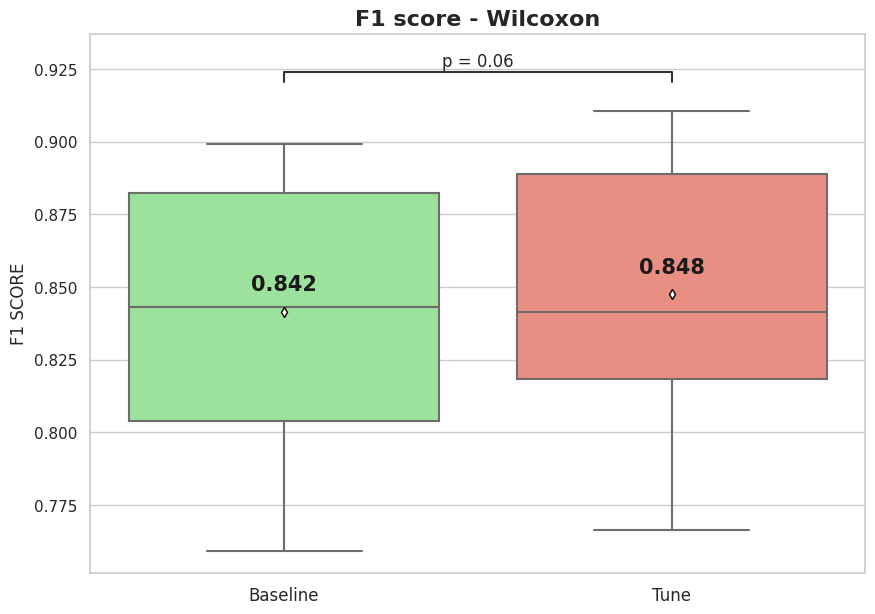

In [35]:
import numpy as np
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt
metrics = 'F1'

metric_internal = pd.DataFrame({"Baseline":baseline[metrics].values,
                     "Tune":tune[metrics].values})


df_melt = pd.melt(metric_internal.reset_index(), id_vars=['index'], value_vars= metric_internal.columns)
df_melt.columns = ['index', 'Model', metrics]
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(metric_internal['Baseline'].astype('float'), metric_internal['Tune'].astype('float'), alternative="two-sided"),]


pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       metrics,
    'palette': subcat_palette[1:]
}

pairs = [('Baseline', 'Tune'),]




sns.set_style("whitegrid")
plt.figure(figsize = (10,7))

my_colors = {'Tune': 'salmon', 
             'Baseline': 'lightgreen'}


ax = sns.boxplot(x='Model', y=metrics,data=df_melt, palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"})


mean = round(metric_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =metric_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.008

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)
    

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel(f'{metrics} SCORE', fontsize = 12)
ax.set_xlabel(None)
ax.set_xticklabels(labels = metric_internal.columns, fontsize = 12)
ax.set_title("F1 score - Wilcoxon",fontsize = 16, weight ='semibold')
# plt.show()
plt.savefig(f"./raw_data_features/Data_raw/{metrics}_tune_compare_2",dpi=600)

Baseline vs. Tune: Custom statistical test, P_val:3.285e-01


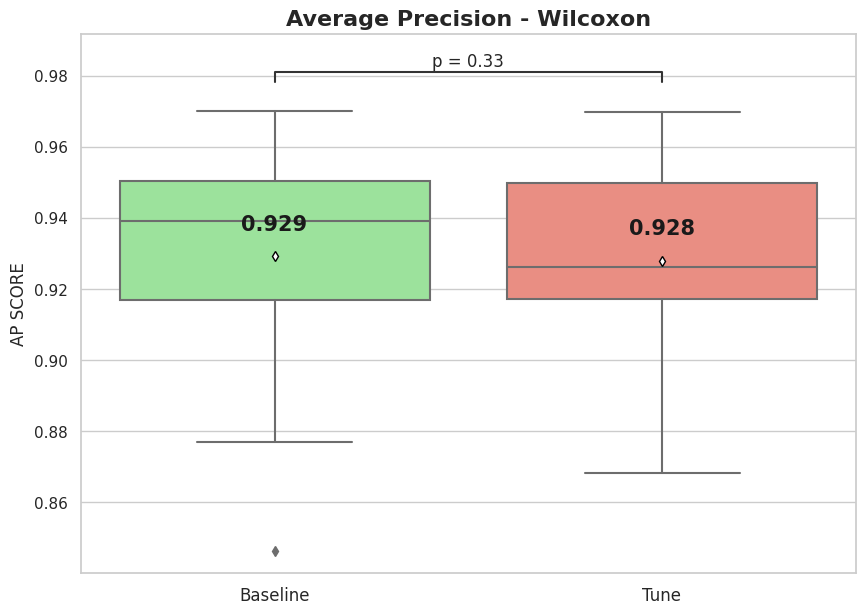

In [36]:
import numpy as np
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt
metrics = 'AP'
metric_internal = pd.DataFrame({"Baseline":baseline[metrics].values,
                     "Tune":tune[metrics].values})

df_melt = pd.melt(metric_internal.reset_index(), id_vars=['index'], value_vars= metric_internal.columns)
df_melt.columns = ['index', 'Model', metrics]
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(metric_internal['Baseline'].astype('float'), metric_internal['Tune'].astype('float'), alternative="two-sided"),]


pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       metrics,
    'palette': subcat_palette[1:]
}

pairs = [('Baseline', 'Tune'),]




sns.set_style("whitegrid")
plt.figure(figsize = (10,7))

my_colors = {'Tune': 'salmon', 
             'Baseline': 'lightgreen'}


ax = sns.boxplot(x='Model', y=metrics,data=df_melt, palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"})


mean = round(metric_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =metric_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.008

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)
    

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel(f'{metrics} SCORE', fontsize = 12)
ax.set_xlabel(None)
ax.set_xticklabels(labels = metric_internal.columns, fontsize = 12)
ax.set_title("Average Precision - Wilcoxon",fontsize = 16, weight ='semibold')
# plt.show()
plt.savefig(f"./raw_data_features/Data_raw/{metrics}_tune_compare_2",dpi=600)

Baseline vs. Tune: Custom statistical test, P_val:7.044e-04


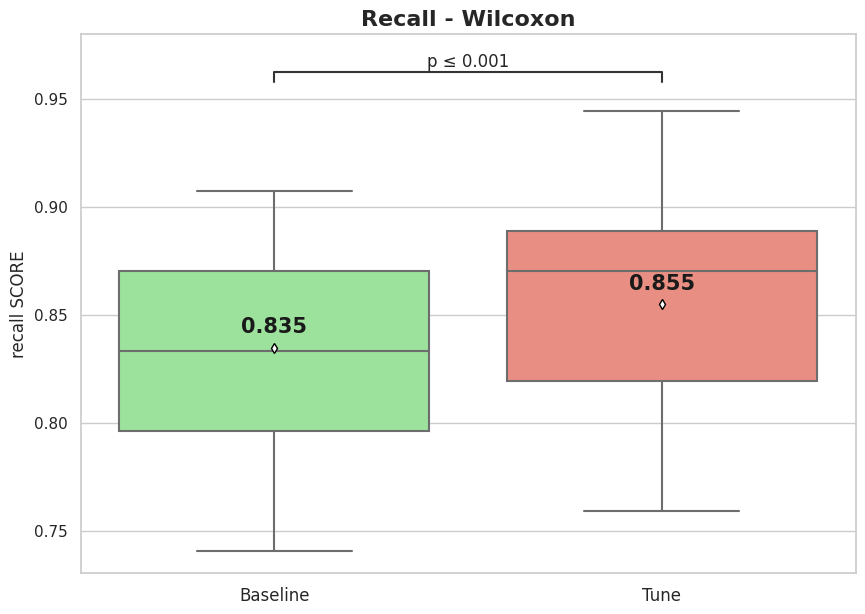

In [37]:
import numpy as np
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt
metrics = 'recall'
metric_internal = pd.DataFrame({"Baseline":baseline[metrics].values,
                     "Tune":tune[metrics].values})

df_melt = pd.melt(metric_internal.reset_index(), id_vars=['index'], value_vars= metric_internal.columns)
df_melt.columns = ['index', 'Model', metrics]
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(metric_internal['Baseline'].astype('float'), metric_internal['Tune'].astype('float'), alternative="two-sided"),]


pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       metrics,
    'palette': subcat_palette[1:]
}

pairs = [('Baseline', 'Tune'),]




sns.set_style("whitegrid")
plt.figure(figsize = (10,7))

my_colors = {'Tune': 'salmon', 
             'Baseline': 'lightgreen'}


ax = sns.boxplot(x='Model', y=metrics,data=df_melt, palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"})


mean = round(metric_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =metric_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.008

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)
    

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel(f'{metrics} SCORE', fontsize = 12)
ax.set_xlabel(None)
ax.set_xticklabels(labels = metric_internal.columns, fontsize = 12)
ax.set_title("Recall - Wilcoxon",fontsize = 16, weight ='semibold')
# plt.show()
plt.savefig(f"./raw_data_features/Data_raw/{metrics}_tune_compare_2",dpi=600)